In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from wordcloud import *
from functools import reduce
from PIL import Image
pd.set_option('display.max_rows', 200)
from statsmodels.graphics.mosaicplot import mosaic
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"

path = './'

#complete DFs
rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAArtists.pkl')
moma_artworks = pd.read_pickle(path+'MOMA_data/pickle/MoMAartworks.pkl')
moma_artworks_old =  pd.read_pickle(path+'MOMA_data/pickle/old_artworks.pkl')
moma_artworks_old.loc[:,'DateAcquired'] = moma_artworks_old['DateAcquired'].where((moma_artworks_old['DateAcquired'].str.len() <= 4), moma_artworks_old['DateAcquired'].str[0:4])
moma_artworks_old['DateAcquired'] = moma_artworks_old['DateAcquired'].replace('nan', str('0'))
moma_artworks_old['DateAcquired']=moma_artworks_old['DateAcquired'].astype('int')
moma_artworks_new = pd.read_pickle(path+'MOMA_data/pickle/new_artworks.pkl')
moma_artworks_new.loc[:,'DateAcquired'] = moma_artworks_new['DateAcquired'].where((moma_artworks_new['DateAcquired'].str.len() <= 4), moma_artworks_new['DateAcquired'].str[0:4])
moma_artworks_new['DateAcquired'] = moma_artworks_new['DateAcquired'].replace('nan', str('0'))
moma_artworks_new['DateAcquired']=moma_artworks_new['DateAcquired'].astype('int')
moma_artworks = pd.concat([moma_artworks_old, moma_artworks_new])
moma_rhz_compare = moma_artworks_new.loc[moma_artworks_new['DateAcquired'] >= 2000]
moma_rhz_compare = moma_rhz_compare.loc[moma_rhz_compare['DateCreated'] >= 1983]

#MoMA department DFs
moma_arch_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont.pkl')
moma_arch_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod.pkl')
moma_arch = pd.concat([moma_arch_cont, moma_arch_mod])
moma_design_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_cont.pkl')
moma_design_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_mod.pkl')
moma_design = pd.concat([moma_design_cont, moma_design_mod])
moma_draw_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont.pkl')
moma_draw_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod.pkl')
moma_draw = pd.concat([moma_draw_cont, moma_draw_mod]) 
moma_films_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont.pkl')
moma_films_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod.pkl')
moma_films = pd.concat([moma_films_cont, moma_films_mod]) 
moma_fluxus_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont.pkl')
moma_fluxus_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod.pkl')
moma_fluxus = pd.concat([moma_fluxus_cont, moma_fluxus_mod]) 
moma_media_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont.pkl')
moma_media_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod.pkl')
moma_media = pd.concat([moma_media_cont, moma_media_mod]) 
moma_paint_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont.pkl')
moma_paint_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod.pkl')
moma_paint = pd.concat([moma_paint_cont, moma_paint_mod]) 
moma_photo_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont.pkl')
moma_photo_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod.pkl')
moma_photo = pd.concat([moma_photo_cont, moma_photo_mod]) 

#Rhizome with text
rhizome_txt_clean = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra_text_clean.pkl')
rhizome_txt_stop_kw = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra_text_clean_stop_keywords.pkl')

#MoMA with text
moma_arch_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont_text_final.pkl')
moma_arch_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod_text_only_final.pkl')
moma_draw_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont_text_final.pkl')
moma_draw_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod_text_final.pkl')
moma_films_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont_text_final.pkl')
moma_films_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod_text_final.pkl')
moma_fluxus_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont_text_final.pkl')
moma_fluxus_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod_text_final.pkl')
moma_media_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont_text_final.pkl')
moma_media_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod_text_final.pkl')
moma_paint_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont_text_final.pkl')
moma_paint_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod_text_final.pkl')
moma_photo_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont_text_final.pkl')
moma_photo_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod_text_final.pkl')

#moma text stop and keywords
moma_arch_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont_text_final_stop.pkl')
moma_arch_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod_text_only_final_stop.pkl')
moma_draw_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont_text_final_stop.pkl')
moma_draw_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod_text_final_stop.pkl')
moma_films_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont_text_final_stop.pkl')
moma_films_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod_text_final_stop.pkl')
moma_media_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont_text_final_stop.pkl')
moma_media_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod_text_final_stop.pkl')
moma_paint_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont_text_final_stop.pkl')
moma_paint_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod_text_final_stop.pkl')
moma_photo_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont_text_final_stop.pkl')
moma_photo_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod_text_final_stop.pkl')
moma_full_text_stop = pd.concat([moma_arch_cont_text_stop, moma_draw_cont_text_stop, moma_draw_mod_text_stop, moma_films_cont_text_stop, moma_films_mod_text_stop, moma_media_cont_text_stop, moma_media_mod_text_stop, moma_paint_cont_text_stop, moma_paint_mod_text_stop, moma_photo_cont_text_stop, moma_photo_mod_text_stop])

**FUNCTIONS**

In [2]:
def group_genders(df, collection):
    if collection == 'MoMA':
        collectives = ['M', 'F', 'missing', 'NB']
    else:
        collectives = ['M', 'F', 'missing', 'N/B']
    df = df['Gender'].value_counts().rename_axis('Gender').reset_index(name='Counts')
    df_collectives = ['collectives', df[~df.Gender.isin(collectives)]['Counts'].sum()]
    df = df.loc[~df.Gender.isin(collectives) == False].reset_index(drop=True)
    df.loc[5] = df_collectives
    df = df.sort_values(by='Counts', ascending=False).replace('M', 'Male').replace('F', 'Female')
    return df

def genders_over_time(df, time_var, time_title, collection):
    if collection == 'MoMA':
        nonbinary = 'NB'
    else: 
        nonbinary = 'N/B'
    df_m = df.loc[df['Gender'] == 'M']
    df_m = df_m[time_var].value_counts().rename_axis(time_title).reset_index(name='Male Artists')
    df_f = df.loc[df['Gender'] == 'F']
    df_f = df_f[time_var].value_counts().rename_axis(time_title).reset_index(name='Female Artists')
    df_merge = pd.merge(df_m, df_f, on=time_title, how='outer')
    df_nb = df.loc[df['Gender'] == nonbinary]
    df_nb = df_nb[time_var].value_counts().rename_axis(time_title).reset_index(name='Non Binary Artists')
    df_col = df[(df['Gender'] != 'M') & (df['Gender'] != 'F') & (df['Gender'] != 'missing') & (df['Gender'] != nonbinary)]
    df_col = df_col[time_var].value_counts().rename_axis(time_title).reset_index(name='Collectives')
    df_missing = df.loc[df['Gender'] == 'missing']
    df_missing = df_missing[time_var].value_counts().rename_axis(time_title).reset_index(name='Artists with Missing Gender')
    df_extra = pd.merge(df_nb, df_col, on=time_title, how='outer')
    df_merge = pd.merge(df_merge, df_extra, on=time_title, how='outer')
    df_merge = pd.merge(df_merge, df_missing, on=time_title, how='outer')
    df_merge = df_merge.fillna('0')
    df_merge = df_merge.loc[df_merge[time_title] != 0]
    df_merge = df_merge.astype(int)
    df_merge = df_merge.sort_values(by=time_title).reset_index(drop=True)
    return df_merge


1/ What is the gender representation in each datasets? Rhizome, MoMA (full)
--> gender across date acquired + date created OR gender across total artworks OR gender across specific medium 

Viz: 
1/ line plots or histogram for time dimension over date acquired 
2/ donut/pie charts for total artworks/medium 
-> subset question to account for differences in numbers e.g. breakdown by decades 
Answer/Story: what interesting details do the viz show us? e.g. Females work across more medium than males in MoMA dataset / Male over representation 


**RHIZOME GENDER REP PIE CHART**

In [3]:
#create a DF w/ genders and counts, group collectives together
rhz_gender_rep = group_genders(rhz_artworks, 'Rhizome')

In [10]:
fig = px.pie(rhz_gender_rep, values='Counts', names='Gender',
             title='Gender Breakdown of Rhizome Collection')
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None, pull=[0, 0, 0, 0.2])
fig.update_layout(width=800)
fig.show()

In [5]:
#create a list of rhizome mediums based on keywords research 
rhz_medium = rhizome_txt_stop_kw.copy()
# create a list of our conditionsP
conditions = [
    (rhz_medium['Text'].str.contains('video|film|animation|movie|tv', regex=True)),
    (rhz_medium['Text'].str.contains('images|image|photographs|photography|photo|photos|painting|drawing', regex=True)),
    (rhz_medium['Text'].str.contains('installation|performance')),
    (rhz_medium['Text'].str.contains('sound|audio|song|music', regex=True)),
    (rhz_medium['Text'].str.contains('website|flash|java|data|database|webpage|net|internet|site|sites|online|webbased', regex=True)),
    (rhz_medium['Text'].str.contains('conceptual|concept')),
    (rhz_medium['Text'].str.contains('augmented|virtual|reality|game|interaction|interactive|interface', regex=True)),
    (rhz_medium['Text'].str.contains('text|email')),
    ]

# create a list of the values we want to assign for each condition
values = ['Moving Images', 'Images, Painting, Photos', 'Installation & Performance', 'Audio-based', 'Websites & Data', 'Conceptual', 'Interactive', 'Text-based']

# create a new column and use np.select to assign values to it using our lists as arguments
rhz_medium['Medium'] = np.select(conditions, values)

# display updated DataFrame
rhz_medium['Medium'] = rhz_medium['Medium'].replace('0', 'missing')


In [6]:
rhz_gender_rep_mi = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Moving Images'], 'Rhizome')
rhz_gender_rep_img = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Images, Painting, Photos'], 'Rhizome')
rhz_gender_rep_intall = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Installation & Performance'], 'Rhizome')
rhz_gender_rep_audio = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Audio-based'], 'Rhizome')
rhz_gender_rep_web = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Websites & Data'], 'Rhizome')
rhz_gender_rep_concept = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Conceptual'], 'Rhizome')
rhz_gender_rep_inter = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Interactive'], 'Rhizome')
rhz_gender_rep_text = group_genders(rhz_medium.loc[rhz_medium['Medium'] == 'Text-based'], 'Rhizome')

In [11]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=4, specs=specs, subplot_titles=['Moving Images', 'Still Images', 'Installation & Performance', 'Audio-based', 'Websites & Data', 'Conceptual', 'Interactive', 'Text-based'])
fig.add_trace(go.Pie(values=rhz_gender_rep_mi['Counts'], labels=rhz_gender_rep_mi['Gender']
                     ), 1, 1)
fig.add_trace(go.Pie(values=rhz_gender_rep_img['Counts'], labels=rhz_gender_rep_img['Gender']
                    ), 1, 2)
fig.add_trace(go.Pie(values=rhz_gender_rep_intall['Counts'], labels=rhz_gender_rep_intall['Gender']
                    ), 1, 3)
fig.add_trace(go.Pie(values=rhz_gender_rep_audio['Counts'], labels=rhz_gender_rep_audio['Gender']
                    ), 1, 4)
fig.add_trace(go.Pie(values=rhz_gender_rep_web['Counts'], labels=rhz_gender_rep_web['Gender']
                    ), 2, 1)
fig.add_trace(go.Pie(values=rhz_gender_rep_concept['Counts'], labels=rhz_gender_rep_concept['Gender']
                    ), 2, 2)
fig.add_trace(go.Pie(values=rhz_gender_rep_inter['Counts'], labels=rhz_gender_rep_inter['Gender']
                    ), 2, 3)
fig.add_trace(go.Pie(values=rhz_gender_rep_text['Counts'], labels=rhz_gender_rep_text['Gender']
                    ), 2, 4)
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None)
fig.update(layout_title_text='Gender Breakdown of Rhizome Collection by Medium (10% of collection missing)')

fig = go.Figure(fig)
fig.update_layout(height=800, width=1200)
fig.show()

In [8]:
rhz_gender_rep_years = rhz_artworks.copy()
rhz_gender_rep_00s = rhz_gender_rep_years[(rhz_gender_rep_years['dateAcquired'] <= '2010') & (rhz_gender_rep_years['dateAcquired'] != '0')]
rhz_gender_rep_00s = group_genders(rhz_gender_rep_00s, 'Rhizome')
rhz_gender_rep_10s = rhz_gender_rep_years[(rhz_gender_rep_years['dateAcquired'] <= '2020') & (rhz_gender_rep_years['dateAcquired'] >= '2010')]
rhz_gender_rep_10s = group_genders(rhz_gender_rep_10s, 'Rhizome')
rhz_gender_rep_20s = rhz_gender_rep_years[(rhz_gender_rep_years['dateAcquired'] >= '2020')]
rhz_gender_rep_20s = group_genders(rhz_gender_rep_20s, 'Rhizome')

In [12]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs, subplot_titles=['2000s', '2010s', '2020s'])
fig.add_trace(go.Pie(values=rhz_gender_rep_00s['Counts'], labels=rhz_gender_rep_00s['Gender']
                     ), 1, 1)
fig.add_trace(go.Pie(values=rhz_gender_rep_10s['Counts'], labels=rhz_gender_rep_10s['Gender']
                    ), 1, 2)
fig.add_trace(go.Pie(values=rhz_gender_rep_20s['Counts'], labels=rhz_gender_rep_20s['Gender']
                    ), 1, 3)
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None)
fig.update(layout_title_text='Gender Breakdown of Rhizome Collection by Decade of Acquisition')

fig = go.Figure(fig)
fig.update_layout(height=600, width=1200)
fig.show()

**MoMA GENDER REP PIE CHART**

In [13]:
#create a DF w/ genders and counts, group collectives together
moma_gender_rep = group_genders(moma_artworks, 'MoMA')

In [161]:
fig = px.pie(moma_gender_rep, values='Counts', names='Gender',
             title='Gender Breakdown of MoMA Collection')
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None, pull=[0, 0, 0, 0.2])
fig.update_layout(width=800)
fig.show()

In [16]:
moma_gender_rep_arch = group_genders(moma_arch, 'MoMA')
moma_gender_rep_design = group_genders(moma_design, 'MoMA')
moma_gender_rep_draw = group_genders(moma_draw, 'MoMA')
moma_gender_rep_films = group_genders(moma_films, 'MoMA')
moma_gender_rep_fluxus = group_genders(moma_fluxus, 'MoMA')
moma_gender_rep_media = group_genders(moma_media, 'MoMA')
moma_gender_rep_paint = group_genders(moma_paint, 'MoMA')
moma_gender_rep_photo = group_genders(moma_photo, 'MoMA')

In [17]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=4, specs=specs, subplot_titles=['Architecture & Design', 'Architecture & Design: Image Archive', 'Drawings & Print', 'Film', 'Fluxus Collection', 'Media & Performance', 'Painting & Sculpture', 'Photography'])
fig.add_trace(go.Pie(values=moma_gender_rep_arch['Counts'], labels=moma_gender_rep_arch['Gender']
                     ), 1, 1)
fig.add_trace(go.Pie(values=moma_gender_rep_design['Counts'], labels=moma_gender_rep_design['Gender']
                    ), 1, 2)
fig.add_trace(go.Pie(values=moma_gender_rep_draw['Counts'], labels=moma_gender_rep_draw['Gender']
                    ), 1, 3)
fig.add_trace(go.Pie(values=moma_gender_rep_films['Counts'], labels=moma_gender_rep_films['Gender']
                    ), 1, 4)
fig.add_trace(go.Pie(values=moma_gender_rep_fluxus['Counts'], labels=moma_gender_rep_fluxus['Gender']
                    ), 2, 1)
fig.add_trace(go.Pie(values=moma_gender_rep_media['Counts'], labels=moma_gender_rep_media['Gender']
                    ), 2, 2)
fig.add_trace(go.Pie(values=moma_gender_rep_paint['Counts'], labels=moma_gender_rep_paint['Gender']
                    ), 2, 3)
fig.add_trace(go.Pie(values=moma_gender_rep_photo['Counts'], labels=moma_gender_rep_photo['Gender']
                    ), 2, 4)
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None)
fig.update(layout_title_text='Gender Breakdown of MoMA Collection by Department')

fig = go.Figure(fig)
fig.update_layout(height=800, width=1200)
fig.show()

In [18]:
moma_gender_rep_years = moma_artworks.copy()
moma_gender_rep_20s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1929) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_20s = group_genders(moma_gender_rep_20s, 'MoMA')
moma_gender_rep_30s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1939) & (moma_gender_rep_years['DateAcquired'] >= 1930) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_30s = group_genders(moma_gender_rep_30s, 'MoMA')
moma_gender_rep_40s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1949) & (moma_gender_rep_years['DateAcquired'] >= 1940) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_40s = group_genders(moma_gender_rep_40s, 'MoMA')
moma_gender_rep_50s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1959) & (moma_gender_rep_years['DateAcquired'] >= 1950) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_50s = group_genders(moma_gender_rep_50s, 'MoMA')
moma_gender_rep_60s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1969) & (moma_gender_rep_years['DateAcquired'] >= 1960) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_60s = group_genders(moma_gender_rep_60s, 'MoMA')
moma_gender_rep_70s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1979) & (moma_gender_rep_years['DateAcquired'] >= 1970) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_70s = group_genders(moma_gender_rep_70s, 'MoMA')
moma_gender_rep_80s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1989) & (moma_gender_rep_years['DateAcquired'] >= 1980) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_80s = group_genders(moma_gender_rep_80s, 'MoMA')
moma_gender_rep_90s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 1999) & (moma_gender_rep_years['DateAcquired'] >= 1990) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_90s = group_genders(moma_gender_rep_90s, 'MoMA')
moma_gender_rep_00s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 2009) & (moma_gender_rep_years['DateAcquired'] >= 2000) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_00s = group_genders(moma_gender_rep_00s, 'MoMA')
moma_gender_rep_10s = moma_gender_rep_years[(moma_gender_rep_years['DateAcquired'] <= 2019) & (moma_gender_rep_years['DateAcquired'] >= 2010) & (moma_gender_rep_years['DateAcquired'] != 0)]
moma_gender_rep_10s = group_genders(moma_gender_rep_10s, 'MoMA')


In [162]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
fig.add_trace(go.Pie(values=moma_gender_rep_20s['Counts'], labels=moma_gender_rep_20s['Gender']
                     ), 1, 1)
fig.add_trace(go.Pie(values=moma_gender_rep_30s['Counts'], labels=moma_gender_rep_30s['Gender']
                    ), 1, 2)
fig.add_trace(go.Pie(values=moma_gender_rep_40s['Counts'], labels=moma_gender_rep_40s['Gender']
                    ), 1, 3)
fig.add_trace(go.Pie(values=moma_gender_rep_50s['Counts'], labels=moma_gender_rep_50s['Gender']
                    ), 1, 4)
fig.add_trace(go.Pie(values=moma_gender_rep_60s['Counts'], labels=moma_gender_rep_60s['Gender']
                    ), 1, 5)
fig.add_trace(go.Pie(values=moma_gender_rep_70s['Counts'], labels=moma_gender_rep_70s['Gender']
                    ), 2, 1)
fig.add_trace(go.Pie(values=moma_gender_rep_80s['Counts'], labels=moma_gender_rep_80s['Gender']
                    ), 2, 2)
fig.add_trace(go.Pie(values=moma_gender_rep_90s['Counts'], labels=moma_gender_rep_90s['Gender']
                    ), 2, 3)
fig.add_trace(go.Pie(values=moma_gender_rep_00s['Counts'], labels=moma_gender_rep_00s['Gender']
                    ), 2, 4)
fig.add_trace(go.Pie(values=moma_gender_rep_10s['Counts'], labels=moma_gender_rep_10s['Gender']
                    ), 2, 5)
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent', hovertemplate=None)
fig.update(layout_title_text='Gender Breakdown of MoMA Collection by Decade of Acquisition')

fig = go.Figure(fig)
fig.update_layout(height=600, width=1200)
fig.show()

**RHIZOME GENDER LINE PLOTS**

In [20]:
rhz_artworks['dateAcquired'] = rhz_artworks['dateAcquired'].astype(int)
rhz_artworks['dateCreated'] = rhz_artworks['dateCreated'].astype(int)
rhz_gender_artworks_acquired = genders_over_time(rhz_artworks, 'dateAcquired', 'Date Acquired', 'Rhizome')
rhz_gender_artworks_created = genders_over_time(rhz_artworks, 'dateCreated', 'Date Created', 'Rhizome')

In [21]:
#Dual line plot for Acquisition
fig = px.line(rhz_gender_artworks_acquired, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='Rhizome Artwork Acquisitions by Gender Over Time', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
#fig.add_annotation(x=2015, y=180, text='Artworks with no Date Acquired: 92', showarrow=False)
fig.show()

In [195]:
moma_compare_gender_artworks_acquired = genders_over_time(moma_rhz_compare, 'DateAcquired', 'Date Acquired', 'MoMA')

In [ ]:
moma_compare_gender_artworks_acquired[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']] = moma_compare_gender_artworks_acquired[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']].div(10).round(2)
moma_compare_gender_artworks_acquired[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']] = moma_compare_gender_artworks_acquired[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']].astype(int)
moma_compare_gender_artworks_acquired

In [200]:
#Dual line plot for Acquisition
fig = px.line(moma_compare_gender_artworks_acquired, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender Over Time w/ Sampling', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
#fig.add_annotation(x=2015, y=180, text='Artworks with no Date Acquired: 92', showarrow=False)
fig.show()

In [22]:
#Dual line plot for Creation
fig = px.line(rhz_gender_artworks_created, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='Rhizome Artwork Creations by Gender Over Time', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.add_annotation(x=2015, y=180, text='Artworks with no Date Created: 91', showarrow=False)
fig.show()

**MOMA GENDER LINE PLOTS**

In [23]:
moma_gender_artworks_acquired = genders_over_time(moma_artworks, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_gender_artworks_created = genders_over_time(moma_artworks, 'DateCreated', 'Date Created', 'MoMA')

In [24]:
#create moma decades
moma_decades_acquired = moma_gender_artworks_acquired.copy()
moma_decades_acquired['Date Acquired'] = moma_decades_acquired['Date Acquired'].astype(str)
# create a list of our conditionsP
conditions = [
    (moma_decades_acquired['Date Acquired'].str.contains('192')),
    (moma_decades_acquired['Date Acquired'].str.contains('193')),
    (moma_decades_acquired['Date Acquired'].str.contains('194')),
    (moma_decades_acquired['Date Acquired'].str.contains('195')),
    (moma_decades_acquired['Date Acquired'].str.contains('196')),
    (moma_decades_acquired['Date Acquired'].str.contains('197')),
    (moma_decades_acquired['Date Acquired'].str.contains('198')),
    (moma_decades_acquired['Date Acquired'].str.contains('199')),
    (moma_decades_acquired['Date Acquired'].str.contains('200')),
    (moma_decades_acquired['Date Acquired'].str.contains('201')),
    (moma_decades_acquired['Date Acquired'].str.contains('202')),
    ]

# create a list of the values we want to assign for each condition
values = ['1920s', '1930s', '1940s', '1950s','1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# create a new column and use np.select to assign values to it using our lists as arguments
moma_decades_acquired['Decades'] = np.select(conditions, values)

#reset types
moma_decades_acquired['Date Acquired'] = moma_decades_acquired['Date Acquired'].astype(int)
moma_decades_acquired['Decades'] = moma_decades_acquired['Decades'].astype(str)

In [25]:
#Dual line plot for Acquisition
fig = px.line(moma_gender_artworks_acquired, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender Over Time', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified", xaxis = dict(
        tickmode = 'array',
        tickvals = [1932, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
        ticktext = ['1932', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
    ))
fig.add_annotation(x=2010, y=10000, text='Artworks with no Date Acquired: 6685', showarrow=False)
fig.show()

In [27]:
#Dual line plot for Creation
fig = px.line(moma_gender_artworks_created, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='MoMA Artwork Creations by Gender Over Time', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.add_annotation(x=1880, y=1600, text='Artworks with no Date Created: 3305', showarrow=False)
fig.show()

In [28]:
#Dual line plot for Acquisition
moma_20_30s = pd.merge(moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1920s'], moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1930s'], how='outer') 
moma_40s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1940s']
moma_50s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1950s'] 
moma_60s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1960s']
moma_70s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1970s']  
moma_80s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1980s']
moma_90s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1990s'] 
moma_00s = moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '2000s']
moma_10_20s = pd.merge(moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '2010s'], moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '2020s'], how='outer') 

moma_first_half = pd.merge(moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1920s'], moma_decades_acquired.loc[moma_decades_acquired['Decades'] == '1930s'], how='outer') 

fig_1 = px.line(moma_20_30s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1920s & 1930s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_1.update_traces(hovertemplate=None)
fig_1.update_layout(hovermode="x unified")
fig_2 = px.line(moma_40s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1940s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_2.update_traces(hovertemplate=None)
fig_2.update_layout(hovermode="x unified")
fig_3 = px.line(moma_50s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1950s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_3.update_traces(hovertemplate=None)
fig_3.update_layout(hovermode="x unified")
fig_4 = px.line(moma_60s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1960s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_4.update_traces(hovertemplate=None)
fig_4.update_layout(hovermode="x unified")
fig_5 = px.line(moma_70s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1970s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_5.update_traces(hovertemplate=None)
fig_5.update_layout(hovermode="x unified")
fig_6 = px.line(moma_80s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1980s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_6.update_traces(hovertemplate=None)
fig_6.update_layout(hovermode="x unified")
fig_7 = px.line(moma_90s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 1990s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_7.update_traces(hovertemplate=None)
fig_7.update_layout(hovermode="x unified")
fig_8 = px.line(moma_00s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 2000s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_8.update_traces(hovertemplate=None)
fig_8.update_layout(hovermode="x unified")
fig_9 = px.line(moma_10_20s, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Artwork Acquisitions by Gender in the 2010s & 2020s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_9.update_traces(hovertemplate=None)
fig_9.update_layout(hovermode="x unified")


fig_1.show(), fig_2.show(), fig_3.show(), fig_4.show(), fig_5.show(), fig_6.show(), fig_7.show(), fig_8.show(), fig_9.show()


(None, None, None, None, None, None, None, None, None)

In [29]:
moma_gender_artworks_acquired_1st_half = moma_gender_artworks_acquired[(moma_gender_artworks_acquired['Date Acquired'] >= 1929) & (moma_gender_artworks_acquired['Date Acquired'] <= 1979)]
moma_gender_artworks_acquired_2nd_half = moma_gender_artworks_acquired[(moma_gender_artworks_acquired['Date Acquired'] >= 1980)]

fig_1 = px.line(moma_gender_artworks_acquired_1st_half, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Artworks Acquired', 'variable': 'Gender'}, title='MoMA Artwork Acquired by Gender Between 1929 and 1979', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_1.update_traces(hovertemplate=None)
fig_1.update_layout(hovermode="x unified")
#fig.add_annotation(x=1880, y=1600, text='Artworks with no Date Created: 3305', showarrow=False)
#fig.add_annotation(x=1880, y=1800, text='Artworks with Missing Gender Information: 8641', showarrow=False)

fig_2 = px.line(moma_gender_artworks_acquired_2nd_half, x='Date Acquired', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Artworks Acquired', 'variable': 'Gender'}, title='MoMA Artwork Acquired by Gender Between Since 1980', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_2.update_traces(hovertemplate=None)
fig_2.update_layout(hovermode="x unified")

fig_1.show(),fig_2.show()

(None, None)

In [169]:
#Dual line plot for Creation by decade 

moma_gender_artworks_created_1700_1800s = moma_gender_artworks_created[(moma_gender_artworks_created['Date Created'] >= 1700) & (moma_gender_artworks_created['Date Created'] <= 1899)]
moma_gender_artworks_created_1900s_pt1 = moma_gender_artworks_created[(moma_gender_artworks_created['Date Created'] >= 1900) & (moma_gender_artworks_created['Date Created'] <= 1950)]
moma_gender_artworks_created_1900s_pt2 = moma_gender_artworks_created[(moma_gender_artworks_created['Date Created'] >= 1950) & (moma_gender_artworks_created['Date Created'] <= 1999)]
moma_gender_artworks_created_2000s = moma_gender_artworks_created[(moma_gender_artworks_created['Date Created'] >= 2000) & (moma_gender_artworks_created['Date Created'] <= 2020)]


fig_1 = px.line(moma_gender_artworks_created_1700_1800s, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='MoMA Artwork Creations by Gender in the 1700s & 1800s', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_1.update_traces(hovertemplate=None)
fig_1.update_layout(hovermode="x unified")
#fig.add_annotation(x=1880, y=1600, text='Artworks with no Date Created: 3305', showarrow=False)
#fig.add_annotation(x=1880, y=1800, text='Artworks with Missing Gender Information: 8641', showarrow=False)

fig_2 = px.line(moma_gender_artworks_created_1900s_pt1, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='MoMA Artwork Creations by Gender Between 1900 and 1950', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_2.update_traces(hovertemplate=None)
fig_2.update_layout(hovermode="x unified")

fig_3 = px.line(moma_gender_artworks_created_1900s_pt2, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='MoMA Artwork Creations by Gender Between 1950 and 2000', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_3.update_traces(hovertemplate=None)
fig_3.update_layout(hovermode="x unified")

fig_4 = px.line(moma_gender_artworks_created_2000s, x='Date Created', y=['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Artworks Created', 'variable': 'Gender'}, title='MoMA Artwork Creations by Gender Since 2000', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig_4.update_traces(hovertemplate=None)
fig_4.update_layout(hovermode="x unified")

fig_1.show(),fig_2.show(), fig_3.show(), fig_4.show()

(None, None, None, None)

**GENDER REP BTW RHZ AND MOMA**

2/ How does gender representation within each dataset compare? Rhizome vs MoMA 1983+ / MoMA pre-1983 vs MoMA post-1983 
--> same across time (date created) OR across total OR across medium 

Viz: 
1/ rhizome v moma1983 w/ sampling (shrink down by 100%?) over time w/ line plot 
2/ moma pre v moma post w/ bar or column charts (maybe stacked bar chart) 
Story: ?? 

In [30]:
rhz_gender_rep = group_genders(rhz_artworks, 'Rhizome')
moma_small_gender_rep = group_genders(moma_rhz_compare, 'MoMA')
moma_small_gender_rep['Counts'] = moma_small_gender_rep['Counts'].div(10).round(2)
moma_small_gender_rep['Counts'] = moma_small_gender_rep['Counts'].astype(int)
moma_small_gender_rep = moma_small_gender_rep.replace('NB', 'N/B')

In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=rhz_gender_rep['Gender'],
    y=rhz_gender_rep['Counts'],
    name='Rhizome',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=moma_small_gender_rep['Gender'],
    y=moma_small_gender_rep['Counts'],
    name='MoMA',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_traces(hoverinfo='y')
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=500, title='Gender Composition of Collections with Sampling', xaxis={'categoryorder':'total descending'})
fig.show()

In [33]:
moma_gender_rep_1st_half = group_genders(moma_artworks_old, 'MoMA')
moma_gender_rep_2nd_half = group_genders(moma_artworks_new, 'MoMA')

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=moma_gender_rep_1st_half['Gender'],
    y=moma_gender_rep_1st_half['Counts'],
    name='MoMA before 1980',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=moma_gender_rep_2nd_half['Gender'],
    y=moma_gender_rep_2nd_half['Counts'],
    name='MoMA since 1980',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_traces(hoverinfo='y')
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=600, title='Gender Composition of MoMA Collection before and after 1980', xaxis={'categoryorder':'total descending'})
fig.show()

In [35]:
moma_gender_artworks_acquired_sampled = genders_over_time(moma_rhz_compare, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_gender_artworks_acquired_sampled[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']] =  moma_gender_artworks_acquired_sampled[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']].div(10)
moma_gender_artworks_acquired_sampled[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']] = moma_gender_artworks_acquired_sampled[['Male Artists', 'Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender']].astype(int)
compare_genders_time = pd.merge(moma_gender_artworks_acquired_sampled, rhz_gender_artworks_acquired, on='Date Acquired', how='outer', suffixes=['_MoMA', '_Rhizome'])
compare_genders_time = compare_genders_time.fillna(0)
compare_genders_time = compare_genders_time.astype(int)

In [170]:
fig = px.line(compare_genders_time, x='Date Acquired', y=['Date Acquired', 'Male Artists_MoMA', 'Female Artists_MoMA',
       'Collectives_MoMA',
       'Male Artists_Rhizome',
       'Female Artists_Rhizome', 
       'Collectives_Rhizome'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='Acquisitions by Gender Over Time between Collection with Sampling', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
#fig.add_annotation(x=2015, y=180, text='Artworks with no Date Acquired: 92', showarrow=False)
fig.show()

In [37]:
moma_arch = moma_arch.replace('nan', '0')
moma_arch['DateAcquired'] = moma_arch['DateAcquired'].astype(int)
moma_gender_rep_arch_2 = genders_over_time(moma_arch, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_draw = moma_draw.replace('nan', '0')
moma_draw['DateAcquired'] = moma_draw['DateAcquired'].astype(int)
moma_gender_rep_draw_2 = genders_over_time(moma_draw, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_films = moma_films.replace('nan', '0')
moma_films['DateAcquired'] = moma_films['DateAcquired'].astype(int)
moma_gender_rep_films_2 = genders_over_time(moma_films, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_media = moma_media.replace('nan', '0')
moma_media['DateAcquired'] = moma_media['DateAcquired'].astype(int)
moma_gender_rep_media_2 = genders_over_time(moma_media, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_paint = moma_paint.replace('nan', '0')
moma_paint['DateAcquired'] = moma_paint['DateAcquired'].astype(int)
moma_gender_rep_paint_2 = genders_over_time(moma_paint, 'DateAcquired', 'Date Acquired', 'MoMA')
moma_photo = moma_photo.replace('nan', '0')
moma_photo['DateAcquired'] = moma_photo['DateAcquired'].astype(int)
moma_gender_rep_photo_2 = genders_over_time(moma_photo, 'DateAcquired', 'Date Acquired', 'MoMA')

In [175]:
fig = px.line(moma_gender_rep_media_2, x='Date Acquired', y=['Female Artists', 'Collectives', 'Non Binary Artists', 'Artists with Missing Gender'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Architecture Acquisitions by Gender Over Time', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852", "Collectives": "#143798"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
#fig.add_annotation(x=2015, y=180, text='Artworks with no Date Acquired: 92', showarrow=False)
fig.show()

8/ What keywords are most prominent in text descriptions? Rhizome vs MoMA 1983+ / MoMA pre-83 v MoMA post-83
--> barcharts/wordclouds 

Viz: wordcloud / parallel set 
Story: 


In [69]:
rhz_wc = set(rhizome_txt_stop_kw['Keywords'].to_list())
rhz_wc = ' '.join(rhz_wc)

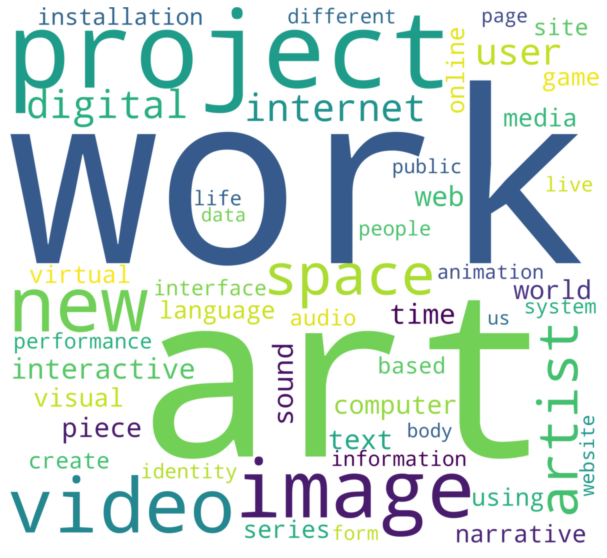

In [70]:
rhz_wordcloud = WordCloud(background_color='white', width=2400, height=2200, max_words=50, stopwords=['september', 'december', 'august', 'april', 'july', 'march', 'january', 'february', 'may', 'june', 'october', 'november', 'like', 'use', 'two', 'one', 'u']).generate(rhz_wc)
plt.figure(figsize=(20,10))
plt.imshow(rhz_wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

In [67]:
moma_wc = set(moma_full_text_stop['Keywords'].to_list())
moma_wc_2 = set(moma_arch_mod_text_stop['Keywords'].to_list())
moma_wc = ' '.join(moma_wc)
moma_wc_2 = ' '.join(moma_wc_2)
moma_wc = moma_wc + moma_wc_2

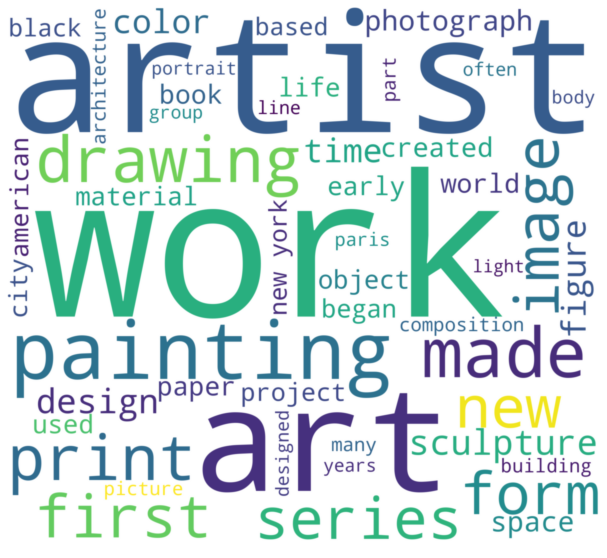

In [77]:
moma_wordcloud = WordCloud(background_color='white', width=2400, height=2200, max_words=50, stopwords=['br', 'three', 'The', 'like', 'year']).generate(moma_wc)
plt.figure(figsize=(20,10))
plt.imshow(moma_wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

In [ ]:
rhz_tree = pd.DataFrame(columns=['Keywords'])
rhz_kw_2 = rhizome_txt_stop_kw['Keywords'].values.tolist()
rhz_kw_2 = ' '.join(rhz_kw_2)
rhz_kw_2 = list(rhz_kw_2.split(', '))
rhz_tree['Keywords'] = rhz_kw_2
rhz_tree = rhz_tree['Keywords'].value_counts().rename_axis('Keywords').reset_index(name='Counts')
rhz_tree['Source'] = 'Rhizome'
moma_tree = pd.DataFrame(columns=['Keywords'])
moma_kw_2 = moma_full_text_stop['Keywords'].values.tolist()
moma_kw_2 = ' '.join(moma_kw_2)
moma_kw_2 = list(moma_kw_2.split(', '))
moma_tree['Keywords'] = moma_kw_2
moma_tree = moma_tree['Keywords'].value_counts().rename_axis('Keywords').reset_index(name='Counts')
moma_tree['Source'] = 'MoMA'
kw_tree = pd.concat([moma_tree, rhz_tree])
kw_tree

In [248]:
stopwords=['september', 'december', 'august', 'april', 'july', 'march', 'january', 'february', 'may', 'june', 'october', 'november', 'like', 'use', 'two', 'one', 'u', 'br', 'three', 'The', 'like', 'year', 'also', 'well', 'twenty', 'forms']

kw_tree_clean = kw_tree[~kw_tree['Keywords'].isin(stopwords)]

In [250]:
kw_tree_clean = kw_tree_clean.loc[kw_tree_clean['Counts'] >= 100]
fig = px.treemap(kw_tree_clean, path=['Source', 'Keywords'], values='Counts',
                  color='Source', maxdepth=2)
fig.update_traces(hovertemplate=None, textinfo='label', hoverinfo='label+value')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

